In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk import *
from nltk.text import Text
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

## Data Exploration

In [2]:
file_path = "ESConv.json"

with open(file_path, "r", encoding="utf-8") as file:
    dataset = json.load(file)

In [3]:
import pandas as pd

# Extract relevant information from the corpus
corpus_data = []
for corpus in dataset:
    experience_type = corpus['experience_type']
    emotion_type = corpus['emotion_type']
    problem_type = corpus['problem_type']
    situation = corpus['situation']
    dialog_length = len(corpus['dialog'])
    corpus_data.append([experience_type, emotion_type, problem_type, situation, dialog_length])

df = pd.DataFrame(corpus_data, columns=['Experience Type', 'Emotion Type', 'Problem Type', 'Situation', 'Dialog Length'])

df


,Experience Type,Emotion Type,Problem Type,Situation,Dialog Length
0,Previous Experience,anxiety,job crisis,I hate my job but I am scared to quit and seek...,27
1,Current Experience,anger,problems with friends,I have complete unsupportive friends its to th...,69
2,Current Experience,fear,job crisis,I have been out of work for five weeks in quar...,37
3,Current Experience,depression,ongoing depression,I am depressed staying home due to COVID,24
4,Current Experience,depression,breakup with partner,I found out that my boyfriend had been lying t...,74
5,Current Experience,anxiety,job crisis,the uncertainty surrounding the corona virus p...,25
6,Current Experience,anxiety,job crisis,I am looking for more online jobs. but it is h...,32
7,Current Experience,depression,ongoing depression,General depression made worse by the severity ...,30
8,Current Experience,sadness,problems with friends,They are always demotivate my economic status....,18
9,Current Experience,disgust,breakup with partner,"I really blew it with my girlfriend, so she le...",33


In [4]:
# Extract the number of words in each conversation
corpus_data = []
for corpus in dataset:
    dialog_length = len(corpus['dialog'])
    word_count = sum(len(dialog['content'].split()) for dialog in corpus['dialog'])
    corpus_data.append([dialog_length, word_count])

df = pd.DataFrame(corpus_data, columns=['Dialog Length', 'Word Count'])
df
# Dialog length is the number of individual dialogues or exchanges that occur within a conversation. 
# Word count is the total number of words used in the conversation

,Dialog Length,Word Count
0,27,407
1,69,830
2,37,988
3,24,323
4,74,915
5,25,464
6,32,451
7,30,309
8,18,213
9,33,395


In [5]:
summary_stats = df['Word Count'].describe()
summary_stats

count    1300.000000
mean      483.892308
std       185.946020
min       133.000000
25%       361.750000
50%       453.000000
75%       573.000000
max      1895.000000
Name: Word Count, dtype: float64

In [6]:
df_sorted = df.sort_values(by='Word Count', ascending=False)
df_sorted

,Dialog Length,Word Count
293,120,1895
842,72,1846
614,81,1582
980,99,1549
574,42,1336
766,94,1228
720,47,1189
351,30,1176
713,68,1141
760,38,1130


In [7]:
# Access and print the first conversation
conversation = dataset[0]
print(conversation)

{'experience_type': 'Previous Experience', 'emotion_type': 'anxiety', 'problem_type': 'job crisis', 'situation': 'I hate my job but I am scared to quit and seek a new career.', 'survey_score': {'seeker': {'initial_emotion_intensity': '5', 'empathy': '5', 'relevance': '5', 'final_emotion_intensity': '1'}, 'supporter': {'relevance': '5'}}, 'dialog': [{'speaker': 'seeker', 'annotation': {}, 'content': 'Hello\n'}, {'speaker': 'supporter', 'annotation': {'strategy': 'Question'}, 'content': 'Hello, what would you like to talk about?'}, {'speaker': 'seeker', 'annotation': {}, 'content': 'I am having a lot of anxiety about quitting my current job. It is too stressful but pays well\n'}, {'speaker': 'supporter', 'annotation': {'strategy': 'Question'}, 'content': 'What makes your job stressful for you?'}, {'speaker': 'seeker', 'annotation': {'feedback': '5'}, 'content': 'I have to deal with many people in hard financial situations and it is upsetting \n'}, {'speaker': 'supporter', 'annotation': {

In [8]:
# Access specific fields within the first conversation
experience_type = conversation["experience_type"]
emotion_type = conversation["emotion_type"]
problem_type = conversation["problem_type"]
situation = conversation["situation"]
survey_score = conversation["survey_score"]
survey_score_seeker = conversation["survey_score"]["seeker"]
survey_score_supporter = conversation["survey_score"]["supporter"]
dialog = conversation["dialog"]

In [9]:
experience_type

'Previous Experience'

In [10]:
emotion_type

'anxiety'

In [11]:
problem_type

'job crisis'

In [12]:
situation

'I hate my job but I am scared to quit and seek a new career.'

In [13]:
survey_score

{'seeker': {'empathy': '5',
  'final_emotion_intensity': '1',
  'initial_emotion_intensity': '5',
  'relevance': '5'},
 'supporter': {'relevance': '5'}}

In [14]:
survey_score_seeker

{'empathy': '5',
 'final_emotion_intensity': '1',
 'initial_emotion_intensity': '5',
 'relevance': '5'}

In [15]:
survey_score_supporter

{'relevance': '5'}

In [16]:
dialog

[{'annotation': {}, 'content': 'Hello\n', 'speaker': 'seeker'},
 {'annotation': {'strategy': 'Question'},
  'content': 'Hello, what would you like to talk about?',
  'speaker': 'supporter'},
 {'annotation': {},
  'content': 'I am having a lot of anxiety about quitting my current job. It is too stressful but pays well\n',
  'speaker': 'seeker'},
 {'annotation': {'strategy': 'Question'},
  'content': 'What makes your job stressful for you?',
  'speaker': 'supporter'},
 {'annotation': {'feedback': '5'},
  'content': 'I have to deal with many people in hard financial situations and it is upsetting \n',
  'speaker': 'seeker'},
 {'annotation': {'strategy': 'Question'},
  'content': 'Do you help your clients to make it to a better financial situation?',
  'speaker': 'supporter'},
 {'annotation': {},
  'content': 'I do, but often they are not going to get back to what they want. Many people are going to lose their home when safeguards are lifted \n',
  'speaker': 'seeker'},
 {'annotation': {'s

In [17]:
dialog = conversation["dialog"]
for message in dialog:
    speaker = message["speaker"]
    content = message["content"]
    print(f"{speaker}: {content}")

seeker: Hello

supporter: Hello, what would you like to talk about?
seeker: I am having a lot of anxiety about quitting my current job. It is too stressful but pays well

supporter: What makes your job stressful for you?
seeker: I have to deal with many people in hard financial situations and it is upsetting 

supporter: Do you help your clients to make it to a better financial situation?
seeker: I do, but often they are not going to get back to what they want. Many people are going to lose their home when safeguards are lifted 

supporter: But you offer them a better future than what they have currently. It may not be what they wanted, but it helps them in the long run.
seeker: That is true but sometimes I feel like I should put my feelings and health first 

supporter: I can understand that. 
supporter: Is there another job that would pay you close to what you currently make?
seeker: Probably not. I was with the same company for a long time and I consistently get a bonus every year 


In [18]:
# Access the seeker's first question
seeker_question1 = conversation["seeker_question1"]
print("Seeker's question 1:", seeker_question1)

# Access the supporter's second question
supporter_question2 = conversation["supporter_question2"]
print("Supporter's question 2:", supporter_question2)

Seeker's question 1: Partner was very supportive
Supporter's question 2: 


In [19]:
def lexical_diversity(text):
    return len(text) / word_type(text)

# bogactwo lexicalne, kazde slowo jest uzywane srednio x razy

In [20]:
def percentage(word, text):
    count = text.count(word) # ile razy zostalo uzyte konkretne slowo
    return 100 * count / len(text)

In [21]:
def word_type(text):
    return len(set(text))
 # w taki sposob moge uzyskac statystyke ile przecietnie pojedynczych slow (word type) uzywa jeden czlowiek na rozmowe

In [22]:
dialog = conversation["dialog"]
first_conv = []
first_conv_str = ""
for message in dialog:
    speaker = message["speaker"]
    content = message["content"]
    if speaker == 'seeker':
        first_conv.append(content.split(' '))
        first_conv_str += content + " "
        
#words = ''.join(first_conv)
# Remove trailing whitespace
first_conv_str = first_conv_str.strip()

single_words_list = [item for sublist in first_conv for item in sublist]

In [23]:
first_conv

[['Hello\n'],
 ['I',
  'am',
  'having',
  'a',
  'lot',
  'of',
  'anxiety',
  'about',
  'quitting',
  'my',
  'current',
  'job.',
  'It',
  'is',
  'too',
  'stressful',
  'but',
  'pays',
  'well\n'],
 ['I',
  'have',
  'to',
  'deal',
  'with',
  'many',
  'people',
  'in',
  'hard',
  'financial',
  'situations',
  'and',
  'it',
  'is',
  'upsetting',
  '\n'],
 ['I',
  'do,',
  'but',
  'often',
  'they',
  'are',
  'not',
  'going',
  'to',
  'get',
  'back',
  'to',
  'what',
  'they',
  'want.',
  'Many',
  'people',
  'are',
  'going',
  'to',
  'lose',
  'their',
  'home',
  'when',
  'safeguards',
  'are',
  'lifted',
  '\n'],
 ['That',
  'is',
  'true',
  'but',
  'sometimes',
  'I',
  'feel',
  'like',
  'I',
  'should',
  'put',
  'my',
  'feelings',
  'and',
  'health',
  'first',
  '\n'],
 ['Probably',
  'not.',
  'I',
  'was',
  'with',
  'the',
  'same',
  'company',
  'for',
  'a',
  'long',
  'time',
  'and',
  'I',
  'consistently',
  'get',
  'a',
  'bonus',
  

In [24]:
single_words_list

['Hello\n',
 'I',
 'am',
 'having',
 'a',
 'lot',
 'of',
 'anxiety',
 'about',
 'quitting',
 'my',
 'current',
 'job.',
 'It',
 'is',
 'too',
 'stressful',
 'but',
 'pays',
 'well\n',
 'I',
 'have',
 'to',
 'deal',
 'with',
 'many',
 'people',
 'in',
 'hard',
 'financial',
 'situations',
 'and',
 'it',
 'is',
 'upsetting',
 '\n',
 'I',
 'do,',
 'but',
 'often',
 'they',
 'are',
 'not',
 'going',
 'to',
 'get',
 'back',
 'to',
 'what',
 'they',
 'want.',
 'Many',
 'people',
 'are',
 'going',
 'to',
 'lose',
 'their',
 'home',
 'when',
 'safeguards',
 'are',
 'lifted',
 '\n',
 'That',
 'is',
 'true',
 'but',
 'sometimes',
 'I',
 'feel',
 'like',
 'I',
 'should',
 'put',
 'my',
 'feelings',
 'and',
 'health',
 'first',
 '\n',
 'Probably',
 'not.',
 'I',
 'was',
 'with',
 'the',
 'same',
 'company',
 'for',
 'a',
 'long',
 'time',
 'and',
 'I',
 'consistently',
 'get',
 'a',
 'bonus',
 'every',
 'year',
 '',
 'I',
 'could',
 'try.',
 'It',
 'mostly',
 'gets',
 'to',
 'me',
 'at',
 'the',
 

In [25]:
single_word_list = [word.replace('\n', '').replace(',', '') for word in single_words_list]

In [26]:
set(single_words_list)

{'',
 '\n',
 'Bye\n',
 'Hello\n',
 'I',
 'It',
 'Many',
 'Maybe',
 'Probably',
 'Sometimes',
 'Thank',
 'Thanks',
 'That',
 'a',
 'about',
 'again',
 'also',
 'am',
 'and',
 'anxiety',
 'are',
 'at',
 'back',
 'big',
 'bonus',
 'but',
 'company',
 'consistently',
 'could',
 'current',
 'day',
 'deal',
 'decision',
 'different',
 'do,',
 'down',
 'end',
 'every',
 'feel',
 'feelings',
 'financial',
 'first',
 'for',
 'get',
 'gets',
 'going',
 'hard',
 'have',
 'having',
 'health',
 'home',
 'if',
 'in',
 'is',
 'it',
 'job.',
 'just',
 'lifted',
 'like',
 'long',
 'lose',
 'lot',
 'many',
 'me',
 'mostly',
 'my',
 'need',
 'not',
 'not.',
 'of',
 'often',
 'pays',
 'people',
 'perspective',
 'put',
 'quitting',
 'really',
 'safeguards',
 'same',
 'should',
 'sit',
 'situations',
 'sometimes',
 'stressful',
 'the',
 'their',
 'they',
 'think',
 'though',
 'time',
 'to',
 'too',
 'true',
 'true.',
 'try.',
 'upsetting',
 'want.',
 'was',
 'well\n',
 'what',
 'when',
 'with',
 'wonder',
 

In [27]:
len(sorted(set(single_words_list)))

105

In [28]:
word_type(single_words_list)

105

In [29]:
lexical_diversity(single_words_list)

1.619047619047619

In [30]:
percentage('I', single_words_list)

5.882352941176471

In [31]:
from nltk import FreqDist

In [32]:
fdist = FreqDist(single_words_list)

In [33]:
fdist.keys()

dict_keys(['Hello\n', 'I', 'am', 'having', 'a', 'lot', 'of', 'anxiety', 'about', 'quitting', 'my', 'current', 'job.', 'It', 'is', 'too', 'stressful', 'but', 'pays', 'well\n', 'have', 'to', 'deal', 'with', 'many', 'people', 'in', 'hard', 'financial', 'situations', 'and', 'it', 'upsetting', '\n', 'do,', 'often', 'they', 'are', 'not', 'going', 'get', 'back', 'what', 'want.', 'Many', 'lose', 'their', 'home', 'when', 'safeguards', 'lifted', 'That', 'true', 'sometimes', 'feel', 'like', 'should', 'put', 'feelings', 'health', 'first', 'Probably', 'not.', 'was', 'the', 'same', 'company', 'for', 'long', 'time', 'consistently', 'bonus', 'every', 'year', '', 'could', 'try.', 'mostly', 'gets', 'me', 'at', 'end', 'day', 'also', 'true.', 'Sometimes', 'wonder', 'if', 'really', 'though', 'Maybe', 'just', 'need', 'sit', 'down', 'think', 'big', 'decision', 'Thank', 'you', 'different', 'perspective', 'Thanks', 'again', 'Bye\n'])

In [34]:
fdist['when']

1

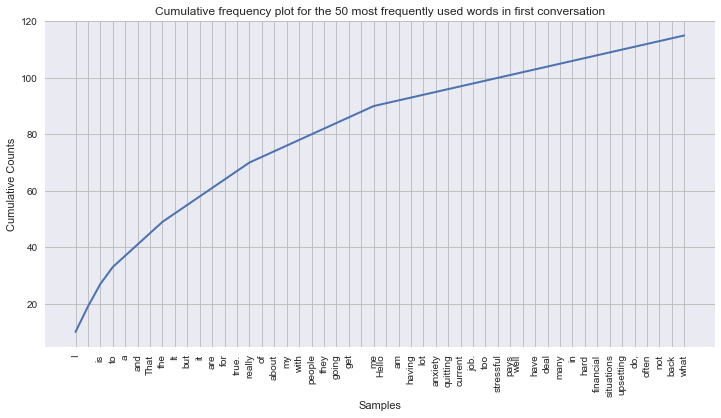

In [35]:
plt.figure(figsize=(12, 6))
plt.title('Cumulative frequency plot for the 50 most frequently used words in first conversation')
fdist.plot(50, cumulative=True)
# Cumulative

In [36]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ad6143\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
# Tokenize the string
first_conv_tokens = nltk.word_tokenize(first_conv_str) # IN: raw text in () -> OUT: <type 'list'>

# Create a Text object from the tokens
text = Text(first_conv_tokens) # IN: tokens -> OUT: <type 'nltk.text.Text'>, operate the other linguistic processing

In [75]:
print(text)

In [76]:
text.collocations() # frequently occurring combinations of words within the text
# here the first conversation is too short or limited
# TODO use it on a corpus

In [78]:
first_conv_str.find('but sometimes I feel like') # search for specific line of characters

334

In [79]:
first_conv_str.rfind('but sometimes I feel like') # search for specific line of characters

334

In [38]:
text.concordance('what')

Displaying 1 of 1 matches:
en they are not going to get back to what they want . Many people are going to


In [39]:
text.similar('axiety')

No matches


In [40]:
#text.common_contexts(['',''])

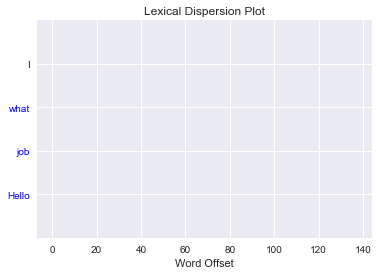

In [41]:
text.dispersion_plot(['I', 'what', 'job', 'Hello']) #za krotka konwersacja?

In [42]:
#for dialog in dataset:
#    if dataset[dialog]['experience_type']:
#        for message in dataset[dialog]:
#            speaker = message["speaker"]
#            content = message["content"]
#            if speaker == 'seeker':
#                first_conv.append(content.split(' '))
#                first_conv_str += content + " "
#                
#first_conv_str = first_conv_str.strip()
#
#single_words_list = [item for sublist in first_conv for item in sublist]

### Fine-Grained Selection of Words

In [43]:
fdist = FreqDist(single_words_list)
sorted([w for w in set(fdist) if len(w)>7])

#len(w)>7 -> tylko wyrazy dluzsze od 7
#fdist[w]>7 -> czy pojawia się wiecej niz 7 razy

['Probably',
 'Sometimes',
 'consistently',
 'decision',
 'different',
 'feelings',
 'financial',
 'perspective',
 'quitting',
 'safeguards',
 'situations',
 'sometimes',
 'stressful',
 'upsetting']

### Collocation is a seq of words that occur together unusually often

In [44]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ad6143\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
bigrams = bigrams(['more', 'is', 'said', 'than', 'done'])

In [46]:
print(list(bigrams))

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]


In [47]:
text.collocations() # no results, too short?

In [48]:
# distribution of word lengths

[len(w) for w in text]
fdist = FreqDist([len(w) for w in text])
fdist

# 36 słów na 4 litery, 33 słowa mają 3 litery itd.

FreqDist({1: 22,
          2: 31,
          3: 33,
          4: 36,
          5: 15,
          6: 13,
          7: 3,
          8: 4,
          9: 6,
          10: 2,
          11: 1,
          12: 1})

In [49]:
fdist.keys() # ilo-literowe są słowa

dict_keys([5, 1, 2, 6, 3, 7, 8, 9, 4, 10, 12, 11])

In [50]:
fdist.items() # to samo tylko w liście

dict_items([(5, 15), (1, 22), (2, 31), (6, 13), (3, 33), (7, 3), (8, 4), (9, 6), (4, 36), (10, 2), (12, 1), (11, 1)])

In [51]:
fdist.max() # których słów było najwięcej? 4-literowych

4

In [52]:
fdist[3] # 3-literowych było 33

33

In [53]:
fdist[4] # 3-literowych było 33

36

In [54]:
fdist.freq(4) # najwięcej było 4-literowych słów, prawie 22% wszystkich

0.2155688622754491

Can help us understand differences between authors, genres, languages

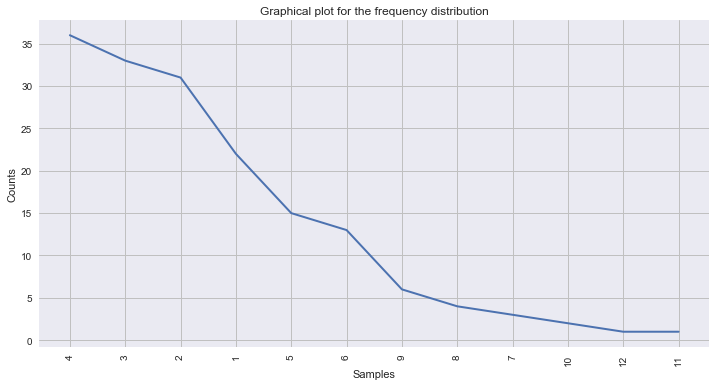

In [55]:
plt.figure(figsize=(12, 6))
plt.title('Graphical plot for the frequency distribution')
fdist.plot(50)
# Cumulative

### Conditional Frequency Distribution

ConditionalFreqDist() powinien zrobić to samo, co FreqDist() tylko, że dla par wyrazów

In [56]:
corpus = dataset[0]

# Extract the dialog content
dialog_content = [dialog['content'] for dialog in corpus['dialog']]

# Tokenize the dialog content
tokenized_dialog = [nltk.word_tokenize(dialog) for dialog in dialog_content]

# Create ConditionalFreqDist
cfdist = nltk.ConditionalFreqDist(
    (len(word), word.lower()) for dialog in tokenized_dialog for word in dialog
) # capture the word frequency distribution conditioned on word length

In [57]:
cfdist.conditions()

[5, 1, 4, 3, 2, 6, 7, 8, 9, 10, 12, 11, 13, 15]

In [58]:
most_common = []
for condition in cfdist.conditions():
    freq_count = cfdist[condition].most_common(5)  # Replace n with the desired number of most common words
    most_common.extend(freq_count)

# Sort the most common words by their frequency count in descending order
most_common.sort(key=lambda x: x[1], reverse=True)
most_common

[('.', 19),
 ('you', 19),
 ('i', 16),
 ('it', 16),
 ('to', 15),
 ('is', 12),
 ('the', 11),
 ('a', 9),
 ('and', 9),
 (',', 8),
 ('what', 8),
 ('that', 8),
 ('for', 7),
 ('do', 7),
 ('your', 6),
 ('but', 6),
 ('about', 5),
 ('?', 5),
 ('they', 5),
 ('in', 5),
 ('really', 5),
 ('with', 4),
 ('people', 4),
 ('financial', 4),
 ('would', 3),
 ('think', 3),
 ('though', 3),
 ('hello', 2),
 ('going', 2),
 ('better', 2),
 ('should', 2),
 ('clients', 2),
 ('someone', 2),
 ('decision', 2),
 ('stressful', 2),
 ('situation', 2),
 ('currently', 2),
 ('sometimes', 2),
 ('situations', 2),
 ('anxiety', 1),
 ('current', 1),
 ('another', 1),
 ('quitting', 1),
 ('feelings', 1),
 ('probably', 1),
 ('possible', 1),
 ('safeguards', 1),
 ('understand', 1),
 ('consistently', 1),
 ('collections', 1),
 ('perspective', 1),
 ('understanding', 1),
 ('compassionately', 1)]

In [59]:
from itertools import chain

# Flatten the tokenized_dialog into a single list of words
all_words = list(chain.from_iterable(tokenized_dialog))

fdist_all = nltk.FreqDist(all_words)

# Get the most common words from the overall frequency distribution
most_common = fdist_all.most_common(5)  # Replace n with the desired number of most common words
most_common

[('you', 19), ('.', 19), ('I', 16), ('to', 15), ('is', 10)]

In [60]:
cfdist[15]

FreqDist({'compassionately': 1})

In [61]:
cfdist[15].most_common()

[('compassionately', 1)]

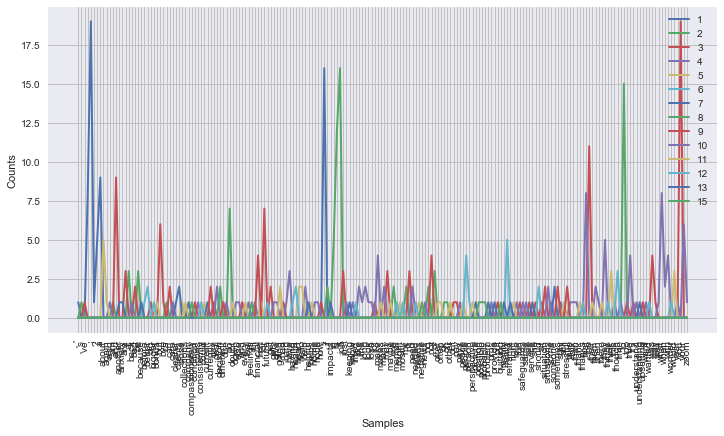

In [62]:
# Plotting the distribution
plt.figure(figsize=(12, 6))
cfdist.plot()

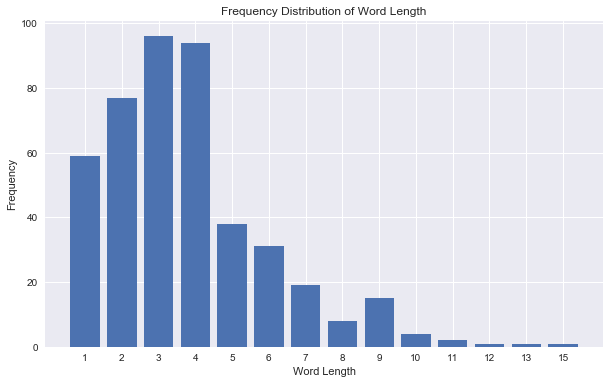

In [63]:
# Get the conditions and their respective frequencies
conditions = sorted(cfdist.conditions())
freq_counts = [cfdist[condition].N() for condition in conditions]

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.bar(range(len(conditions)), freq_counts)
plt.xticks(range(len(conditions)), conditions)
plt.xlabel('Word Length')
plt.ylabel('Frequency')  
plt.title('Frequency Distribution of Word Length')

In [64]:
import sys

# Define the output file path
output_file = 'frequency_distribution.csv'

# Redirect the standard output to a file
with open(output_file, 'w') as f:
    sys.stdout = f
    cfdist.tabulate()
    sys.stdout = sys.__stdout__

print("Frequency distribution saved to", output_file)


In [65]:
cfdist.tabulate(conditions=sorted(cfdist.conditions()), cumulative=True, width=80)

In [66]:
data = []
for condition in sorted(cfdist.conditions()):
    freq_count = cfdist[condition].N()
    data.append([condition, freq_count])
print(data)

In [67]:
nltk.download('words')

def unusual_words(text):
    # find unusual or misspelled words in a text corpus
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_vocab = set(w.lower() for w in nltk.corpus.words.words())
    unusual = text_vocab.difference(english_vocab)
    return sorted(unusual)

In [68]:
unusual_words(dialog) #to nie błąd- po prostu nie było żadnych unusual words

AttributeError: 'dict' object has no attribute 'isalpha'

In [ ]:
from nltk.corpus import stopwords

def content_fraction(text):
    # compute fraction of words in a text are NOT in the stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w for w in text if w.lower() not in stopwords]
    return len(content)/len(text)

In [ ]:
content_fraction(dialog)

In [ ]:
from __future__ import division
import nltk, re pprint

# Data Preprocessing

## Normalizing Text

In [86]:
corpus_data = []
for corpus in dataset:
    experience_type = corpus['experience_type']
    emotion_type = corpus['emotion_type']
    problem_type = corpus['problem_type']
    situation = corpus['situation']
    dialog_length = len(corpus['dialog'])
    corpus_data.append([experience_type, emotion_type, problem_type, situation, dialog_length])

df = pd.DataFrame(corpus_data, columns=['Experience Type', 'Emotion Type', 'Problem Type', 'Situation', 'Dialog Length'])

df['Situation'][0]

'I hate my job but I am scared to quit and seek a new career.'

### 1. lowercase

In [87]:
# set(w.lower() for w in text)

In [88]:
# Convert JSON data to a DataFrame
import pandas as pd

df = pd.io.json.json_normalize(dataset)
print(df.head(5))

In [89]:
df.info() # different sizes

In [90]:
df.isnull().sum().sort_values(ascending=False)

survey_score.supporter.relevance                 185
survey_score.seeker.relevance                    150
survey_score.seeker.final_emotion_intensity      150
survey_score.seeker.empathy                      150
survey_score.seeker.initial_emotion_intensity      0
supporter_question2                                0
supporter_question1                                0
situation                                          0
seeker_question2                                   0
seeker_question1                                   0
problem_type                                       0
experience_type                                    0
emotion_type                                       0
dialog                                             0
dtype: int64

In [91]:
df.fillna(method="ffill")

,dialog,emotion_type,experience_type,problem_type,seeker_question1,seeker_question2,situation,supporter_question1,supporter_question2,survey_score.seeker.empathy,survey_score.seeker.final_emotion_intensity,survey_score.seeker.initial_emotion_intensity,survey_score.seeker.relevance,survey_score.supporter.relevance
0,"[{'speaker': 'seeker', 'annotation': {}, 'cont...",anxiety,Previous Experience,job crisis,Partner was very supportive,More guidance in conversation or examples,I hate my job but I am scared to quit and seek...,,,5,1,5,5,5
1,"[{'speaker': 'supporter', 'annotation': {'stra...",anger,Current Experience,problems with friends,,,I have complete unsupportive friends its to th...,It was simple,The middle screen hover function gets in the way,5,1,5,5,4
2,"[{'speaker': 'supporter', 'annotation': {'stra...",fear,Current Experience,job crisis,no,no,I have been out of work for five weeks in quar...,,,5,2,4,5,5
3,"[{'speaker': 'supporter', 'annotation': {'stra...",depression,Current Experience,ongoing depression,No,No,I am depressed staying home due to COVID,,,4,3,4,4,5
4,"[{'speaker': 'supporter', 'annotation': {'stra...",depression,Current Experience,breakup with partner,Good exercise,no,I found out that my boyfriend had been lying t...,,,4,4,5,5,5
5,"[{'speaker': 'supporter', 'annotation': {'stra...",anxiety,Current Experience,job crisis,no,no,the uncertainty surrounding the corona virus p...,,,4,4,5,4,3
6,"[{'speaker': 'supporter', 'annotation': {'stra...",anxiety,Current Experience,job crisis,no,no,I am looking for more online jobs. but it is h...,,,3,2,3,3,5
7,"[{'speaker': 'seeker', 'annotation': {}, 'cont...",depression,Current Experience,ongoing depression,,,General depression made worse by the severity ...,nothing,,3,3,4,3,5
8,"[{'speaker': 'seeker', 'annotation': {}, 'cont...",sadness,Current Experience,problems with friends,no,no,They are always demotivate my economic status....,,,3,3,4,3,5
9,"[{'speaker': 'supporter', 'annotation': {'stra...",disgust,Current Experience,breakup with partner,I didn't like that they didn't know the termin...,Get more progressive participants.,"I really blew it with my girlfriend, so she le...",The conversation was very hard to gain a solid...,everything is great.,3,3,4,2,2


In [92]:
for col in df:
    if type(df[col]) == 'object':
        df[col] = df[col].fillna(value='unknown')
    else:
        df[col] =df[col].fillna(value=0)

In [93]:
df.isnull().sum().sum()

0

# Columns

In [94]:
df['emotion_type'].value_counts()

anxiety        354
depression     334
sadness        308
anger          111
fear            95
shame           42
disgust         40
nervousness     13
guilt            1
pain             1
jealousy         1
Name: emotion_type, dtype: int64

In [95]:
df['experience_type'].value_counts()

Current Experience     991
Previous Experience    309
Name: experience_type, dtype: int64

In [96]:
df['problem_type'].value_counts()

ongoing depression       351
job crisis               280
breakup with partner     239
problems with friends    179
academic pressure        156
Sleep Problems            28
Procrastination           13
Appearance Anxiety        12
Alcohol Abuse             12
conflict with parents     10
Issues with Children      10
Issues with Parents        8
School Bullying            2
Name: problem_type, dtype: int64

In [97]:
df['survey_score.seeker.empathy'].value_counts() # 1-5

5    730
4    295
0    150
3    114
2      7
1      4
Name: survey_score.seeker.empathy, dtype: int64

In [98]:
df['survey_score.seeker.final_emotion_intensity'].value_counts() # 1-4

2    469
1    329
3    290
0    150
4     62
Name: survey_score.seeker.final_emotion_intensity, dtype: int64

In [99]:
df['survey_score.seeker.initial_emotion_intensity'].value_counts() 
# 1-5 # good to show in pair: initial and final emotion intensity

4    567
5    427
3    267
2     37
1      2
Name: survey_score.seeker.initial_emotion_intensity, dtype: int64

In [100]:
df['survey_score.seeker.relevance'].value_counts() # 2-5

5    790
4    272
0    150
3     79
2      9
Name: survey_score.seeker.relevance, dtype: int64

In [101]:
df['survey_score.supporter.relevance'].value_counts() # 0-5

5    901
0    185
4    152
3     43
2     12
0      4
1      3
Name: survey_score.supporter.relevance, dtype: int64

# Dialog

In [102]:
df['dialog'] # dialogs from whole dataset

0       [{'speaker': 'seeker', 'annotation': {}, 'cont...
1       [{'speaker': 'supporter', 'annotation': {'stra...
2       [{'speaker': 'supporter', 'annotation': {'stra...
3       [{'speaker': 'supporter', 'annotation': {'stra...
4       [{'speaker': 'supporter', 'annotation': {'stra...
5       [{'speaker': 'supporter', 'annotation': {'stra...
6       [{'speaker': 'supporter', 'annotation': {'stra...
7       [{'speaker': 'seeker', 'annotation': {}, 'cont...
8       [{'speaker': 'seeker', 'annotation': {}, 'cont...
9       [{'speaker': 'supporter', 'annotation': {'stra...
10      [{'speaker': 'supporter', 'annotation': {'stra...
11      [{'speaker': 'supporter', 'annotation': {'stra...
12      [{'speaker': 'seeker', 'annotation': {}, 'cont...
13      [{'speaker': 'supporter', 'annotation': {'stra...
14      [{'speaker': 'seeker', 'annotation': {}, 'cont...
15      [{'speaker': 'seeker', 'annotation': {}, 'cont...
16      [{'speaker': 'supporter', 'annotation': {'stra...
17      [{'spe

In [103]:
df['dialog'][0] # 1st dialog

[{'annotation': {}, 'content': 'Hello\n', 'speaker': 'seeker'},
 {'annotation': {'strategy': 'Question'},
  'content': 'Hello, what would you like to talk about?',
  'speaker': 'supporter'},
 {'annotation': {},
  'content': 'I am having a lot of anxiety about quitting my current job. It is too stressful but pays well\n',
  'speaker': 'seeker'},
 {'annotation': {'strategy': 'Question'},
  'content': 'What makes your job stressful for you?',
  'speaker': 'supporter'},
 {'annotation': {'feedback': '5'},
  'content': 'I have to deal with many people in hard financial situations and it is upsetting \n',
  'speaker': 'seeker'},
 {'annotation': {'strategy': 'Question'},
  'content': 'Do you help your clients to make it to a better financial situation?',
  'speaker': 'supporter'},
 {'annotation': {},
  'content': 'I do, but often they are not going to get back to what they want. Many people are going to lose their home when safeguards are lifted \n',
  'speaker': 'seeker'},
 {'annotation': {'s

In [104]:
df['dialog'][0][0] # one statement with all information about who is talking etc.

{'annotation': {}, 'content': 'Hello\n', 'speaker': 'seeker'}

In [105]:
df['dialog'][0][0]['content'] # one statement

'Hello\n'

In [106]:
df['dialog'][0][1]['content']

'Hello, what would you like to talk about?'

In [107]:
statement = df['dialog'][0]

for i in statement:
    print(i['content'])

In [108]:
# remove punctuation
def remove_punctuation(text):
    no_punct = "".join([c for c in text if c not in string.punctuation])
    return no_punct

In [109]:
df['dialog'][0][0]['content']

'Hello\n'

In [110]:
for conversation in df['dialog']:
    for single_conversation in conversation:
        single_conv = single_conversation['content']

In [111]:
single_conv = single_conv.apply(lambda x: remove_punctuation(x))
single_conv.head()

AttributeError: 'str' object has no attribute 'apply'

# Lexical Dispersion Plot

In [ ]:
first_conv = ''
for conversation in df['dialog']:
    for single_conversation in conversation:
        single_conv = single_conversation['content']
        first_conv += single_conv

In [ ]:
first_conv

# Convert the string to an NLTK text object
text_object = nltk.Text(nltk.word_tokenize(first_conv))

# Create the ConcordanceIndex
concordance_index = nltk.ConcordanceIndex(text_object)

In [ ]:
file.close()